In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)  # Force remount to refresh access

Mounted at /content/drive


In [3]:
import os

DATA_PATH = "/content/drive/My Drive"

# Check if the dataset folder exists
if os.path.exists(DATA_PATH):
    print("✅ Dataset folder found!")
    print("Files inside:", os.listdir(DATA_PATH))
else:
    print("❌ Dataset folder NOT found! Check the path.")

✅ Dataset folder found!
Files inside: ['Untitled form.gform', 'ambulance', 'Colab Notebooks', 'Audio', 'Amb_3.wav', 'Amb.wav', 'Amb4.wav', 'Copy of sound_603.wav', 'traffic.json', 'Veh.wav', 'traffic.csv', 'siren_detection_model.keras']


In [4]:
import pandas as pd

file_path = r"/content/drive/My Drive/traffic.csv"
df = pd.read_csv(file_path)

print(df.columns)  # Display column names
print(df.head())   # Show first few rows


Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')
              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041


In [5]:
df = pd.read_csv(file_path, parse_dates=['DateTime'])  # Use 'DateTime' instead of 'date_time'
df.rename(columns={'DateTime': 'date_time', 'Junction': 'junction_no', 'Vehicles': 'no_of_cars'}, inplace=True)


In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load dataset
file_path = r"/content/drive/My Drive/traffic.csv"
df = pd.read_csv(file_path, parse_dates=['DateTime'])

# Rename columns for consistency
df.rename(columns={'DateTime': 'date_time', 'Junction': 'junction_no', 'Vehicles': 'no_of_cars'}, inplace=True)

# Sort by date
df.sort_values(by='date_time', inplace=True)

# Normalize car count
scaler = MinMaxScaler()
df['cars_scaled'] = scaler.fit_transform(df[['no_of_cars']])

# Function to create time-series sequences
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

# Create sequences for each junction
time_steps = 10
junctions = df['junction_no'].unique()
X, y = [], []

for junction in junctions:
    df_junc = df[df['junction_no'] == junction]
    X_junc, y_junc = create_sequences(df_junc['cars_scaled'].values, time_steps)
    X.append(X_junc)
    y.append(y_junc)

# Convert to NumPy arrays
X = np.concatenate(X, axis=0)
y = np.concatenate(y, axis=0)

# Split into training & testing
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]


In [7]:
# Reshape data for LSTM
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Define LSTM Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1202/1202 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 0.0031 - val_loss: 9.7159e-04
Epoch 2/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 9.5333e-04 - val_loss: 9.3509e-04
Epoch 3/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 8.8577e-04 - val_loss: 0.0013
Epoch 4/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - loss: 8.8376e-04 - val_loss: 9.7455e-04
Epoch 5/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - loss: 9.2146e-04 - val_loss: 9.1620e-04
Epoch 6/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 8.6749e-04 - val_loss: 9.0862e-04
Epoch 7/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - loss: 8.3390e-04 - val_loss: 8.5583e-04
Epoch 8/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 8.5748e-04 - val_loss: 8.8190e-04
Epoch 9/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - loss: 8.2125e-04 - val_loss: 0.0011
Epoch 10/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 8.2155e-04 - val_loss: 8.7486e-04
Epoch 11/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━

301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


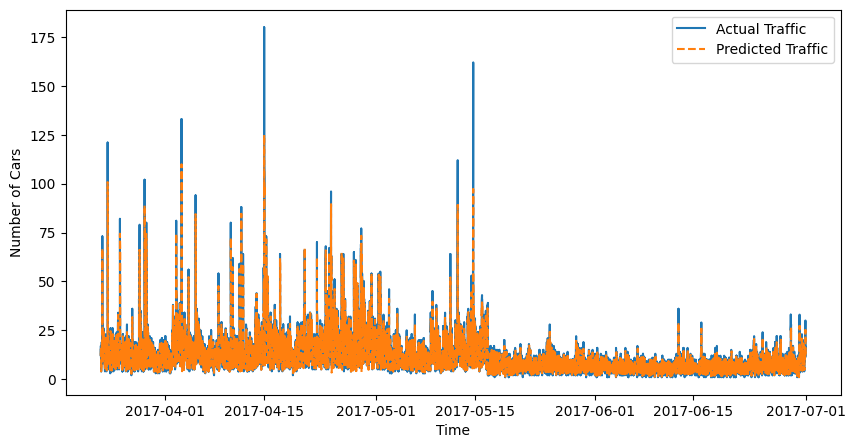

In [8]:
# Predict
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

# Plot results
plt.figure(figsize=(10,5))
plt.plot(df['date_time'][-len(y_test):], scaler.inverse_transform(y_test.reshape(-1,1)), label="Actual Traffic")
plt.plot(df['date_time'][-len(y_test):], y_pred, label="Predicted Traffic", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Number of Cars")
plt.legend()
plt.show()


In [9]:
def predict_future_traffic(last_data, model, scaler, time_steps=10):
    last_data_scaled = scaler.transform(last_data[-time_steps:].reshape(-1, 1))
    last_data_scaled = np.expand_dims(last_data_scaled, axis=0)  # Reshape for LSTM
    future_pred = model.predict(last_data_scaled)
    return scaler.inverse_transform(future_pred)

# Example: Predict next hour's traffic at a junction
future_traffic = predict_future_traffic(df[df['junction_no'] == 1]['no_of_cars'].values, model, scaler)
print(f"Predicted Traffic Volume for Next Hour: {future_traffic[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Traffic Volume for Next Hour: 70.06658935546875


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
